<a href="https://colab.research.google.com/github/BxMild/bsc_dpdm24/blob/main/Crime_case_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
crime_data = pd.read_csv('/content/drive/MyDrive/Data_BSC_DPDM24/crime_data_exported.csv')
crime_data

,ภาค,จังหวัด,ประเภทความผิด,จำนวน,ประเภท,ปี
0,กรุงเทพมหานคร,กรุงเทพมหานคร,ฆ่าผู้อื่น,88.0,รับแจ้ง,2560
1,กรุงเทพมหานคร,กรุงเทพมหานคร,ทำร้ายผู้อื่นถึงแก่ความตาย,48.0,รับแจ้ง,2560
2,กรุงเทพมหานคร,กรุงเทพมหานคร,พยายามฆ่า,110.0,รับแจ้ง,2560
3,กรุงเทพมหานคร,กรุงเทพมหานคร,ทำร้ายร่างกาย,2102.0,รับแจ้ง,2560
4,กรุงเทพมหานคร,กรุงเทพมหานคร,ข่มขืนกระทำชำเรา,226.0,รับแจ้ง,2560
...,...,...,...,...,...,...
8311,ภาคใต้,นราธิวาส,ทำร้ายผู้อื่นถึงแก่ความตาย,4.0,ผู้ต้องหา,2565
8312,ภาคใต้,นราธิวาส,พยายามฆ่า,60.0,ผู้ต้องหา,2565
8313,ภาคใต้,นราธิวาส,ทำร้ายร่างกาย,39.0,ผู้ต้องหา,2565
8314,ภาคใต้,นราธิวาส,ข่มขืนกระทำชำเรา,7.0,ผู้ต้องหา,2565


#แปลงข้อมูลให้อยู่ในรูปแบบ Pivot Table

In [6]:
# แปลงข้อมูลให้อยู่ในรูปแบบ Pivot Table
df_pivot = crime_data.pivot_table(index=['จังหวัด', 'ปี'],
                           columns='ประเภทความผิด',
                           values='จำนวน',
                           aggfunc='sum').reset_index()

# แก้ไขชื่อคอลัมน์ให้อ่านง่ายขึ้น
df_pivot.columns.name = None  # ลบชื่อคอลัมน์ที่เกิดจาก pivot
df_pivot = df_pivot.rename(columns={'ฆ่าผู้อื่น': 'ฆาตกรรม', 'ทำร้ายผู้อื่น': 'ทำร้ายร่างกาย'})

# แสดงผลลัพธ์
df_pivot.head()

,จังหวัด,ปี,ข่มขืนกระทำชำเรา,ฆาตกรรม,ทำร้ายผู้อื่นถึงแก่ความตาย,ทำร้ายร่างกาย,พยายามฆ่า,อื่น ๆ
0,กระบี่,2560,31.0,96.0,3.0,179.0,141.0,41.0
1,กระบี่,2561,22.0,100.0,18.0,255.0,131.0,41.0
2,กระบี่,2562,36.0,51.0,20.0,202.0,75.0,55.0
3,กระบี่,2563,28.0,38.0,6.0,158.0,91.0,121.0
4,กระบี่,2564,34.0,29.0,24.0,88.0,70.0,155.0


#association rules

In [7]:
# prompt: แปลงข้อมูลในรูปแบบ one-hot encoding โดยเงื่อนไขคือ  1 คือ สูง 0 คือ ต้ำ

# Assuming crime counts are now spread across different crime type columns
# We'll categorize each crime type count into 'สูง' (1) and 'ต่ำ' (0) based on a threshold.

# Calculate the median across all crime type columns, excluding 'จังหวัด' and 'ปี'
crime_type_columns = [col for col in df_pivot.columns if col not in ['จังหวัด', 'ปี']]
threshold = df_pivot[crime_type_columns].stack().median()  # Using the median as the threshold

# Create new columns with one-hot encoding for each crime type
for crime_type in crime_type_columns:
    df_pivot[crime_type + '_onehot'] = (df_pivot[crime_type] >= threshold).astype(int)

# Now, for each crime type, there's a corresponding '_onehot' column
# with 1 for counts above or equal to the threshold and 0 otherwise.

df_pivot.head()

,จังหวัด,ปี,ข่มขืนกระทำชำเรา,ฆาตกรรม,ทำร้ายผู้อื่นถึงแก่ความตาย,ทำร้ายร่างกาย,พยายามฆ่า,อื่น ๆ,ข่มขืนกระทำชำเรา_onehot,ฆาตกรรม_onehot,ทำร้ายผู้อื่นถึงแก่ความตาย_onehot,ทำร้ายร่างกาย_onehot,พยายามฆ่า_onehot,อื่น ๆ_onehot
0,กระบี่,2560,31.0,96.0,3.0,179.0,141.0,41.0,0,1,0,1,1,0
1,กระบี่,2561,22.0,100.0,18.0,255.0,131.0,41.0,0,1,0,1,1,0
2,กระบี่,2562,36.0,51.0,20.0,202.0,75.0,55.0,0,1,0,1,1,1
3,กระบี่,2563,28.0,38.0,6.0,158.0,91.0,121.0,0,0,0,1,1,1
4,กระบี่,2564,34.0,29.0,24.0,88.0,70.0,155.0,0,0,0,1,1,1


In [8]:
# prompt: ทำ association rules

from mlxtend.frequent_patterns import apriori, association_rules

# Select only the one-hot encoded columns for association rule mining
onehot_cols = [col for col in df_pivot.columns if '_onehot' in col]
df_onehot = df_pivot[onehot_cols]

# Apply Apriori algorithm
frequent_itemsets = apriori(df_onehot, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
rules

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ข่มขืนกระทำชำเรา_onehot),(ฆาตกรรม_onehot),0.534632,0.361472,0.279221,0.522267,1.444835,1.0,0.085966,1.336580,0.661583,0.452632,0.251822,0.647361
1,(ฆาตกรรม_onehot),(ข่มขืนกระทำชำเรา_onehot),0.361472,0.534632,0.279221,0.772455,1.444835,1.0,0.085966,2.045170,0.482171,0.452632,0.511043,0.647361
2,(ข่มขืนกระทำชำเรา_onehot),(ทำร้ายร่างกาย_onehot),0.534632,0.948052,0.532468,0.995951,1.050524,1.0,0.025609,12.831169,0.103347,0.560364,0.922065,0.778798
3,(ทำร้ายร่างกาย_onehot),(ข่มขืนกระทำชำเรา_onehot),0.948052,0.534632,0.532468,0.561644,1.050524,1.0,0.025609,1.061621,0.925813,0.560364,0.058044,0.778798
4,(พยายามฆ่า_onehot),(ข่มขืนกระทำชำเรา_onehot),0.549784,0.534632,0.409091,0.744094,1.391788,1.0,0.115159,1.818515,0.625254,0.605769,0.450101,0.754638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,(อื่น ๆ_onehot),"(พยายามฆ่า_onehot, ข่มขืนกระทำชำเรา_onehot, ทำ...",0.610390,0.251082,0.225108,0.368794,1.468819,1.0,0.071850,1.186488,0.819231,0.353741,0.157176,0.632673
174,(ทำร้ายร่างกาย_onehot),"(พยายามฆ่า_onehot, อื่น ๆ_onehot, ข่มขืนกระทำช...",0.948052,0.225108,0.225108,0.237443,1.054795,1.0,0.011694,1.016175,1.000000,0.237443,0.015918,0.618721
175,(ข่มขืนกระทำชำเรา_onehot),"(พยายามฆ่า_onehot, อื่น ๆ_onehot, ทำร้ายร่างกา...",0.534632,0.246753,0.225108,0.421053,1.706371,1.0,0.093186,1.301063,0.889535,0.404669,0.231397,0.666667
176,(พยายามฆ่า_onehot),"(ฆาตกรรม_onehot, อื่น ๆ_onehot, ทำร้ายร่างกาย_...",0.549784,0.242424,0.225108,0.409449,1.688976,1.0,0.091827,1.282828,0.906065,0.396947,0.220472,0.669010


In [11]:
# prompt: แสดงสิบกฎที่มีความสัมพันธ์กันสูงสุด

# Display the top 10 rules with the highest lift
top_10_rules = rules.sort_values(by='lift', ascending=False).head(10)
top_10_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
155,"(อื่น ๆ_onehot, ทำร้ายร่างกาย_onehot, ฆาตกรรม_...","(พยายามฆ่า_onehot, ข่มขืนกระทำชำเรา_onehot)",0.268398,0.409091,0.225108,0.838710,2.050179,1.0,0.115309,3.663636,0.700159,0.497608,0.727047,0.694487
170,"(พยายามฆ่า_onehot, ข่มขืนกระทำชำเรา_onehot)","(อื่น ๆ_onehot, ทำร้ายร่างกาย_onehot, ฆาตกรรม_...",0.409091,0.268398,0.225108,0.550265,2.050179,1.0,0.115309,1.626738,0.866864,0.497608,0.385273,0.694487
154,"(พยายามฆ่า_onehot, อื่น ๆ_onehot, ทำร้ายร่างกา...","(ข่มขืนกระทำชำเรา_onehot, ฆาตกรรม_onehot)",0.400433,0.279221,0.225108,0.562162,2.013325,1.0,0.113299,1.646224,0.839454,0.495238,0.392549,0.684182
171,"(ข่มขืนกระทำชำเรา_onehot, ฆาตกรรม_onehot)","(พยายามฆ่า_onehot, อื่น ๆ_onehot, ทำร้ายร่างกา...",0.279221,0.400433,0.225108,0.806202,2.013325,1.0,0.113299,3.093766,0.698285,0.495238,0.676769,0.684182
166,"(อื่น ๆ_onehot, ฆาตกรรม_onehot)","(พยายามฆ่า_onehot, ข่มขืนกระทำชำเรา_onehot, ทำ...",0.274892,0.406926,0.225108,0.818898,2.012397,1.0,0.113248,3.274798,0.693800,0.492891,0.694638,0.686045
159,"(พยายามฆ่า_onehot, ข่มขืนกระทำชำเรา_onehot, ทำ...","(อื่น ๆ_onehot, ฆาตกรรม_onehot)",0.406926,0.274892,0.225108,0.553191,2.012397,1.0,0.113248,1.622861,0.848259,0.492891,0.383804,0.686045
112,"(อื่น ๆ_onehot, ฆาตกรรม_onehot)","(พยายามฆ่า_onehot, ข่มขืนกระทำชำเรา_onehot)",0.274892,0.409091,0.225108,0.818898,2.001750,1.0,0.112652,3.262846,0.690155,0.490566,0.693519,0.684581
113,"(พยายามฆ่า_onehot, ข่มขืนกระทำชำเรา_onehot)","(อื่น ๆ_onehot, ฆาตกรรม_onehot)",0.409091,0.274892,0.225108,0.550265,2.001750,1.0,0.112652,1.612299,0.846893,0.490566,0.379768,0.684581
160,"(ข่มขืนกระทำชำเรา_onehot, ทำร้ายร่างกาย_onehot...","(พยายามฆ่า_onehot, อื่น ๆ_onehot)",0.279221,0.411255,0.225108,0.806202,1.960343,1.0,0.110277,3.037922,0.679660,0.483721,0.670828,0.676785
110,"(พยายามฆ่า_onehot, อื่น ๆ_onehot)","(ข่มขืนกระทำชำเรา_onehot, ฆาตกรรม_onehot)",0.411255,0.279221,0.225108,0.547368,1.960343,1.0,0.110277,1.592419,0.832084,0.483721,0.372025,0.676785


🔎 สรุปผลจากการวิเคราะห์ความสัมพันธ์ของอาชญากรรม จากตาราง Association Rule Mining (กฎความสัมพันธ์) ที่ได้จากข้อมูลอาชญากรรม สามารถสรุปผลสำคัญได้ดังนี้:

ความสัมพันธ์ระหว่าง "ข่มขืนกระทำชำเรา" กับ "ฆาตกรรม" มีโอกาส 52.23% ที่หากเกิดเหตุ ข่มขืนกระทำชำเรา จะเกิด ฆาตกรรม ด้วย ในทางกลับกัน มีโอกาส 77.25% ที่หากเกิด ฆาตกรรม จะมีเหตุ ข่มขืนกระทำชำเรา ค่า Lift = 1.44 แสดงให้เห็นว่าโอกาสที่เหตุการณ์เหล่านี้จะเกิดขึ้นพร้อมกันสูงกว่าการเกิดขึ้นแบบสุ่ม

ความสัมพันธ์ระหว่าง "ข่มขืนกระทำชำเรา" กับ "ทำร้ายร่างกาย" หากเกิด ข่มขืนกระทำชำเรา มีโอกาสสูงถึง 99.59% ที่จะเกิดเหตุ ทำร้ายร่างกาย ด้วย อย่างไรก็ตาม แม้ว่าจะมีเหตุ ทำร้ายร่างกาย แต่มีเพียง 56.16% ที่จะเกี่ยวข้องกับ ข่มขืนกระทำชำเรา ค่า Lift = 1.05 บ่งชี้ว่าความสัมพันธ์นี้มีอยู่จริงแต่ไม่ได้แข็งแกร่งมาก

ความสัมพันธ์ระหว่าง "ข่มขืนกระทำชำเรา" กับ "พยายามฆ่า" หากเกิด ข่มขืนกระทำชำเรา มีโอกาส 76.52% ที่จะนำไปสู่ พยายามฆ่า ค่า Lift = 1.39 บ่งชี้ว่าความสัมพันธ์นี้แข็งแกร่งกว่าค่าเฉลี่ย

📌 ข้อสังเกตและข้อสรุป "ข่มขืนกระทำชำเรา" มักจะเกี่ยวข้องกับอาชญากรรมรุนแรงอื่นๆ เช่น ฆาตกรรม, ทำร้ายร่างกาย และพยายามฆ่า "ทำร้ายร่างกาย" พบได้บ่อยและมักเกิดควบคู่กับคดีข่มขืน แต่ไม่ได้มีความสัมพันธ์ที่แข็งแกร่งในทางกลับกัน "ข่มขืนกระทำชำเรา" กับ "พยายามฆ่า" มีความเชื่อมโยงที่สำคัญ ซึ่งแสดงให้เห็นว่าอาชญากรรมทั้งสองประเภทนี้มีแนวโน้มเกิดร่วมกันสูง

🎯 ข้อเสนอแนะ เพิ่มมาตรการป้องกัน สำหรับอาชญากรรมประเภท ข่มขืนกระทำชำเรา เนื่องจากมีแนวโน้มจะนำไปสู่อาชญากรรมรุนแรงอื่น เฝ้าระวังคดีทำร้ายร่างกาย เพราะแม้จะพบได้ทั่วไป แต่ไม่ได้มีความเชื่อมโยงที่แข็งแกร่งกับคดีข่มขืน อาจต้องใช้แนวทางแก้ปัญหาที่แตกต่าง ตรวจสอบรายละเอียดในคดีข่มขืนและพยายามฆ่า อย่างใกล้ชิด เนื่องจากมีโอกาสสูงที่ทั้งสองเหตุการณ์จะเกิดขึ้นร่วมกัน

# Classification

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data Preprocessing

<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Gl

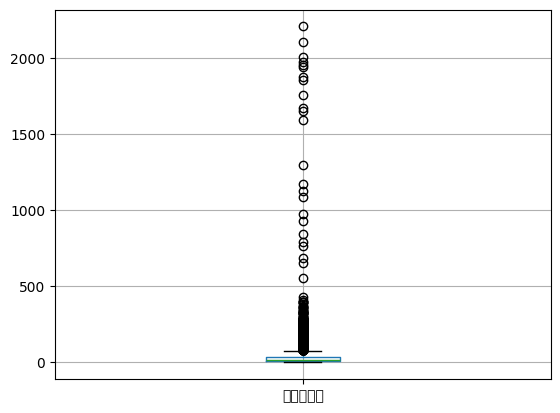

In [30]:
crime_data.boxplot(column="จำนวน")

In [32]:
df_outliers = crime_data[crime_data["จำนวน"] > 500]
print(df_outliers)

                ภาค        จังหวัด  ประเภทความผิด   จำนวน     ประเภท    ปี
3     กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  2102.0    รับแจ้ง  2560
465   กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  1591.0     จับกุม  2560
927   กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  1955.0  ผู้ต้องหา  2560
1389  กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  1942.0    รับแจ้ง  2561
1851  กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  1854.0     จับกุม  2561
2313  กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  1973.0  ผู้ต้องหา  2561
2775  กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  1875.0    รับแจ้ง  2562
3237  กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  1653.0     จับกุม  2562
3699  กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  2008.0  ผู้ต้องหา  2562
4161  กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  1172.0    รับแจ้ง  2563
4163  กรุงเทพมหานคร  กรุงเทพมหานคร         อื่น ๆ   654.0    รับแจ้ง  2563
4623  กรุงเทพมหานคร  กรุงเทพมหานคร  ทำร้ายร่างกาย  1089.0     จับกุม  2563
4625  กรุงเทพมหานคร  กรุง

In [34]:
print(crime_data.groupby("ปี")["จำนวน"].describe())

       count       mean         std  min  25%   50%    75%     max
ปี                                                                
2560  1386.0  40.240260   99.658417  0.0  9.0  19.0  40.75  2102.0
2561  1386.0  40.324675  102.947044  0.0  7.0  18.0  37.00  1973.0
2562  1386.0  36.897547   97.504388  0.0  8.0  16.0  33.00  2008.0
2563  1386.0  32.471861   69.065968  0.0  8.0  18.0  36.00  1297.0
2564  1386.0  32.542569   68.867549  0.0  7.0  16.0  34.00  1124.0
2565  1386.0  34.830447   97.584654  0.0  7.0  16.0  33.00  2207.0


In [37]:
#ใช้ Log Transformation เพื่อลดผลกระทบของ Outliers
import numpy as np
crime_data["จำนวน_log"] = np.log1p(crime_data["จำนวน"])


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


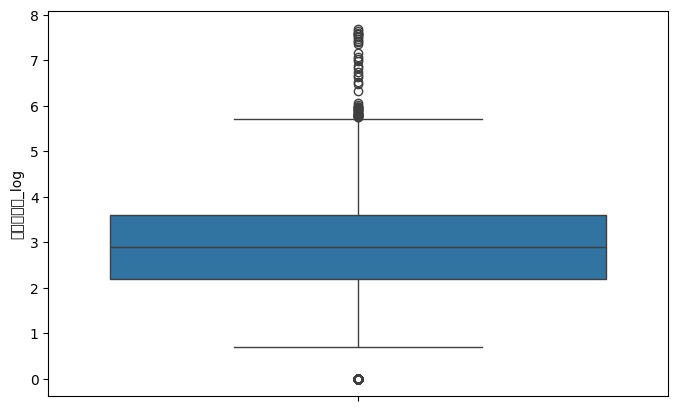

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(y=crime_data["จำนวน_log"])
plt.show()


In [40]:
Q1 = crime_data["จำนวน"].quantile(0.25)
Q3 = crime_data["จำนวน"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = crime_data[crime_data["จำนวน"] <= upper_bound]

In [41]:
df_no_outliers

,ภาค,จังหวัด,ประเภทความผิด,จำนวน,ประเภท,ปี,จำนวน_log
1,กรุงเทพมหานคร,กรุงเทพมหานคร,ทำร้ายผู้อื่นถึงแก่ความตาย,48.0,รับแจ้ง,2560,3.891820
6,ภาคกลาง,สมุทรปราการ,ฆ่าผู้อื่น,33.0,รับแจ้ง,2560,3.526361
7,ภาคกลาง,สมุทรปราการ,ทำร้ายผู้อื่นถึงแก่ความตาย,9.0,รับแจ้ง,2560,2.302585
8,ภาคกลาง,สมุทรปราการ,พยายามฆ่า,42.0,รับแจ้ง,2560,3.761200
10,ภาคกลาง,สมุทรปราการ,ข่มขืนกระทำชำเรา,52.0,รับแจ้ง,2560,3.970292
...,...,...,...,...,...,...,...
8311,ภาคใต้,นราธิวาส,ทำร้ายผู้อื่นถึงแก่ความตาย,4.0,ผู้ต้องหา,2565,1.609438
8312,ภาคใต้,นราธิวาส,พยายามฆ่า,60.0,ผู้ต้องหา,2565,4.110874
8313,ภาคใต้,นราธิวาส,ทำร้ายร่างกาย,39.0,ผู้ต้องหา,2565,3.688879
8314,ภาคใต้,นราธิวาส,ข่มขืนกระทำชำเรา,7.0,ผู้ต้องหา,2565,2.079442


In [55]:
# รวมจำนวนคดีตามจังหวัดและปี
#df_grouped = df_no_outliers.groupby(['ปี', 'จังหวัด'])['จำนวน'].sum().reset_index()
df_grouped = crime_data.groupby(['ปี', 'จังหวัด'])['จำนวน'].sum().reset_index()
# ดูตัวอย่าง
print(df_grouped)

       ปี        จังหวัด   จำนวน
0    2560         กระบี่   491.0
1    2560  กรุงเทพมหานคร  7266.0
2    2560      กาญจนบุรี   857.0
3    2560      กาฬสินธุ์   590.0
4    2560      กำแพงเพชร   458.0
..    ...            ...     ...
457  2565       เพชรบุรี   409.0
458  2565      เพชรบูรณ์   734.0
459  2565            เลย   347.0
460  2565           แพร่   249.0
461  2565     แม่ฮ่องสอน   174.0

[462 rows x 3 columns]


## กำหนดระดับอาชญากรรม (Target Class)

เราจะกำหนด Target Class ตามจำนวนคดีรวม เช่น
✅ "สูง" ถ้าคดีรวม > 1000
✅ "ปานกลาง" ถ้าคดีรวม 500 - 1000
✅ "ต่ำ" ถ้าคดีรวม < 500

In [56]:
# สร้างคอลัมน์ 'ระดับอาชญากรรม'
def classify_crime(total):
    if total > 1000:
        return 'สูง'
    elif total > 500:
        return 'ปานกลาง'
    else:
        return 'ต่ำ'

# Apply ฟังก์ชันเพื่อกำหนดระดับอาชญากรรม
df_grouped['ระดับอาชญากรรม'] = df_grouped['จำนวน'].apply(classify_crime)

# แปลงเป็นตัวเลข (0 = ต่ำ, 1 = ปานกลาง, 2 = สูง)
df_grouped['ระดับอาชญากรรม'] = df_grouped['ระดับอาชญากรรม'].map({'ต่ำ': 0, 'ปานกลาง': 1, 'สูง': 2})

# ดูผลลัพธ์
print(df_grouped)


       ปี        จังหวัด   จำนวน  ระดับอาชญากรรม
0    2560         กระบี่   491.0               0
1    2560  กรุงเทพมหานคร  7266.0               2
2    2560      กาญจนบุรี   857.0               1
3    2560      กาฬสินธุ์   590.0               1
4    2560      กำแพงเพชร   458.0               0
..    ...            ...     ...             ...
457  2565       เพชรบุรี   409.0               0
458  2565      เพชรบูรณ์   734.0               1
459  2565            เลย   347.0               0
460  2565           แพร่   249.0               0
461  2565     แม่ฮ่องสอน   174.0               0

[462 rows x 4 columns]


## แบ่งชุดข้อมูล Train-Test และ Standardization

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# แยก Features และ Target
X = df_grouped[['ปี', 'จำนวน']]  # ใช้ปี และจำนวนคดีเป็นตัวแปรอิสระ
y = df_grouped['ระดับอาชญากรรม']  # ตัวแปรเป้าหมาย

# แบ่งข้อมูลเป็น Train (80%) และ Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำ Standardization ให้ข้อมูลอยู่ในช่วงเดียวกัน
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## ฝึกทีละโมเดลและวัดผลลัพธ์

###  Model 1: Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

# สร้างโมเดล Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# ทำนายผล
y_pred_dt = dt_model.predict(X_test)

# วัดผล
print("🔹 Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


🔹 Decision Tree - Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        16

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [59]:
from sklearn.model_selection import cross_val_score

# ทดสอบ Cross-Validation (5-fold)
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)

print("🔄 Cross-Validation Scores:", cv_scores)
print("📊 ค่าเฉลี่ย Accuracy:", cv_scores.mean())


🔄 Cross-Validation Scores: [1. 1. 1. 1. 1.]
📊 ค่าเฉลี่ย Accuracy: 1.0


### Model 2: Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

# สร้างโมเดล Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ทำนายผล
y_pred_rf = rf_model.predict(X_test)

# วัดผล
print("🔹 Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest - Accuracy: 0.978494623655914
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      0.94      0.97        32
           2       0.89      1.00      0.94        16

    accuracy                           0.98        93
   macro avg       0.96      0.98      0.97        93
weighted avg       0.98      0.98      0.98        93



###  Model 3: K-Nearest Neighbors (KNN)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# สร้างโมเดล KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# ทำนายผล
y_pred_knn = knn_model.predict(X_test)

# วัดผล
print("🔹 KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


🔹 KNN - Accuracy: 0.956989247311828
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.94      0.94      0.94        32
           2       0.88      0.94      0.91        16

    accuracy                           0.96        93
   macro avg       0.94      0.95      0.95        93
weighted avg       0.96      0.96      0.96        93



### Model 4: Support Vector Machine (SVM)

In [62]:
from sklearn.svm import SVC

# สร้างโมเดล SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# ทำนายผล
y_pred_svm = svm_model.predict(X_test)

# วัดผล
print("🔹 SVM - Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔹 SVM - Accuracy: 0.967741935483871
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       0.97      0.94      0.95        32
           2       1.00      0.94      0.97        16

    accuracy                           0.97        93
   macro avg       0.98      0.96      0.97        93
weighted avg       0.97      0.97      0.97        93



## เปรียบเทียบผลลัพธ์

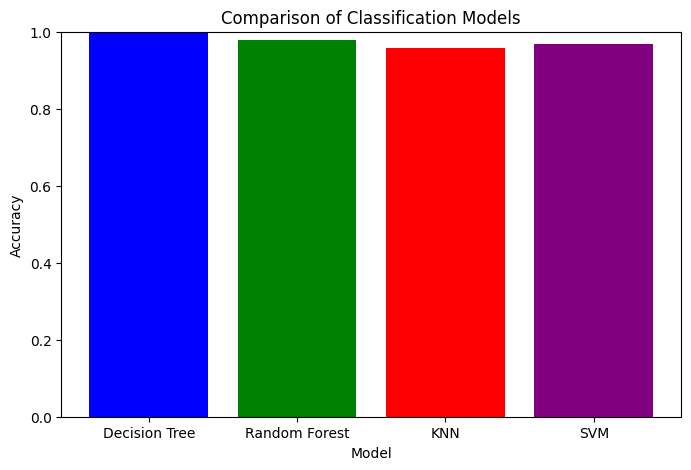

In [63]:
import matplotlib.pyplot as plt

# เก็บผลลัพธ์
results = {
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_pred_svm),
}

# พล็อตกราฟเปรียบเทียบ
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Classification Models")
plt.ylim(0, 1)  # กำหนดช่วงค่า 0-1
plt.show()


## ใช้โมเดลที่ดีที่สุดกับข้อมูลใหม่

In [64]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [66]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
print("Decision Tree - Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_train, y_train_pred_dt))

Decision Tree - Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       122
           2       1.00      1.00      1.00        49

    accuracy                           1.00       369
   macro avg       1.00      1.00      1.00       369
weighted avg       1.00      1.00      1.00       369



In [67]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
print("Random Forest - Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_train, y_train_pred_rf))

Random Forest - Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       122
           2       1.00      1.00      1.00        49

    accuracy                           1.00       369
   macro avg       1.00      1.00      1.00       369
weighted avg       1.00      1.00      1.00       369



In [68]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_train_pred_knn = knn_model.predict(X_train)
print("KNN - Accuracy:", accuracy_score(y_train, y_train_pred_knn))
print("KNN Classification Report:\n", classification_report(y_train, y_train_pred_knn))

KNN - Accuracy: 0.989159891598916
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       0.98      0.99      0.98       122
           2       0.98      0.94      0.96        49

    accuracy                           0.99       369
   macro avg       0.98      0.98      0.98       369
weighted avg       0.99      0.99      0.99       369



In [69]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
print("SVM - Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("SVM Classification Report:\n", classification_report(y_train, y_train_pred_svm))

SVM - Accuracy: 0.967479674796748
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       198
           1       0.99      0.91      0.95       122
           2       1.00      0.98      0.99        49

    accuracy                           0.97       369
   macro avg       0.98      0.96      0.97       369
weighted avg       0.97      0.97      0.97       369

